# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
audit_risk = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

In [3]:
df = pd.merge(audit_risk, trial, how='left')

In [4]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1.7148,1,6.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5108,0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.3096,0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,3.5060,1,2.0,6.0,6.0,6.0,2.0,0.0,2.0,2.0
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2832,0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0


In [5]:
df.shape

(810, 35)

In [6]:
df.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
SCORE_A           float64
SCORE_B           float64
Marks             float64
MONEY_Marks       float64
District          float64
Loss              float64
LOSS_SCORE        float64
History_score     float64
dtype: object

In [7]:
df = df[df.LOCATION_ID.apply(lambda x: x.isnumeric())]
df.LOCATION_ID = df.LOCATION_ID.apply(eval)

In [8]:
df.drop(['Score_A', 'Score_B'], axis=1, inplace = True)
df.dropna(axis = 0, inplace = True)

In [9]:
df.shape

(625, 33)

In [10]:
df.dtypes

Sector_score      float64
LOCATION_ID         int64
PARA_A            float64
Risk_A            float64
PARA_B            float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
SCORE_A           float64
SCORE_B           float64
Marks             float64
MONEY_Marks       float64
District          float64
Loss              float64
LOSS_SCORE        float64
History_score     float64
dtype: object

# Regression

In [11]:
X = df.drop(['Audit_Risk', 'Risk'], axis = 1)
y = df['Audit_Risk']

### KNN Regressor

In [12]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

from sklearn.neighbors import KNeighborsRegressor

Text(0,0.5,'MSE')

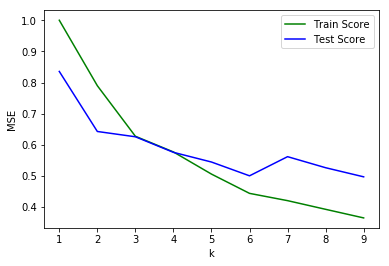

In [13]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

This suggests that the best k parameter is 3

In [14]:
#### KNN Regressor with best pramater: k = 3
from sklearn.model_selection import cross_val_score
knn_reg3 = KNeighborsRegressor(3)
train_scores = cross_val_score(knn_reg3, X_train, y_train, cv=5)
test_scores = cross_val_score(knn_reg3, X_test, y_test, cv=5)
print("Average Cross-validation training score with k=3: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with k=3: {}".format(test_scores.mean()))


Average Cross-validation training score with k=3: 0.35187317202742296
Average Cross-validation testing score with k=3: 0.44392027061701383


In [15]:
knn_reg3.fit(X, y)
pred_knn_reg = knn_reg3.predict(X_test)
pred_knn_reg

array([0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373333,
       0.28373333, 0.28373333, 0.28373333, 0.28373333, 0.28373

In [16]:
from sklearn.metrics import r2_score
knn_reg3 = KNeighborsRegressor(3)
knn_reg3.fit(X_train, y_train)
y_pred = knn_reg3.predict(X_test)
print("R_squared testing score for best KNN Regression: {}".format(r2_score(y_test, y_pred)))

R_squared testing score for best KNN Regression: 0.6257704182748584


### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
train_scores = cross_val_score(lreg, X_train, y_train, cv=5)
test_scores = cross_val_score(lreg, X_test, y_test, cv=5)
print("Average Cross-validation training score: {}".format(train_scores.mean()))
print("Average Cross-validation testing score: {}".format(test_scores.mean()))

Average Cross-validation training score: -1.5931354639693501e+18
Average Cross-validation testing score: 0.6969710479839367


In [18]:
lreg.fit(X, y)
pred_lreg = lreg.predict(X_test)
pred_lreg

array([-20.62069945, -20.64563206, -15.22734684, -18.79944856,
       -14.75917406, -14.83569552, -14.83076029, -14.70416177,
       -14.76726408, -17.93112969, -14.76726408, -14.75896802,
        -8.90707664, -20.93499501, -14.84537822, -14.72772749,
        -9.657765  , -14.76711621, -14.81427979, -14.72351476,
       -20.78664446, -17.8511563 , -14.75274598, -14.84922964,
       -14.76651649, -14.75896802, -18.04703861, -20.23025141,
       -14.83072183, -20.50103298, -18.89195356, -14.79206626,
       -15.46902029, -14.70328507,  -9.51088244, -16.73406742,
       -14.72488076,  -9.56295191, -17.204357  , -19.9272218 ,
       -14.84922964, -14.74992298, -14.76529993, -19.55193818,
       -22.54897304, -19.56301152, -14.88996019, -14.75274388,
       -15.21287013,  -9.3893834 , -14.94458349, -14.76776708,
       -14.76436232, -18.31842475, -20.97880298, -14.82016538,
        10.21420354, -15.34176051, -14.77313636, -17.94943174,
       -20.25506471, -22.4795931 , -14.81542125, -14.73

In [19]:
lreg1 = LinearRegression()
lreg1.fit(X_train, y_train)
y_pred = lreg1.predict(X_test)
print("R_squared testing score for linear Regression: {}".format(r2_score(y_test, y_pred)))

R_squared testing score for linear Regression: 0.4437886917390227


### Ridge Regression

In [20]:
from  sklearn.linear_model import Ridge
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

<IPython.core.display.Javascript object>


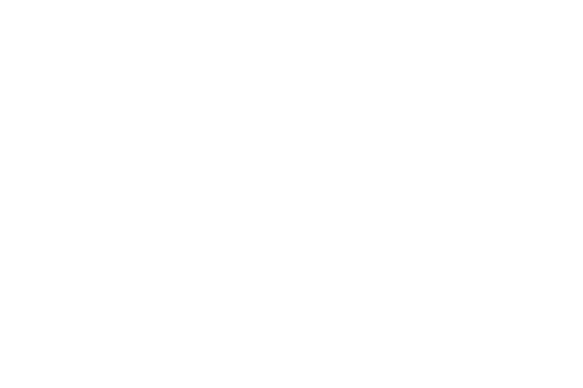

Text(0.5,0,'$\\alpha$')

<IPython.core.display.Javascript object>


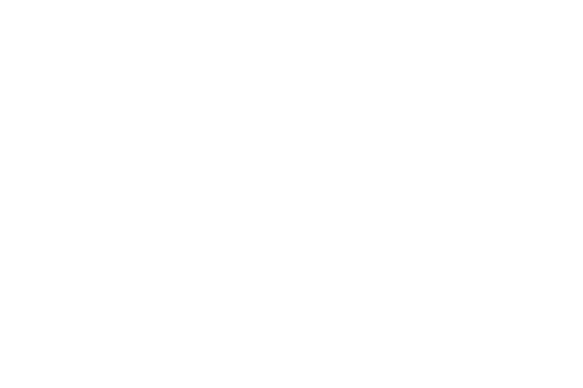

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'r', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 'best')
plt.xlabel(r'$\alpha$')


In [22]:
#### Naive grid search for alpha in ridge regression
best_score = 0

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    # evaluate the ridge regression on the test set
    score = ridge.score(X_test, y_test)
    # if we got a better score, store the score and parameters
    if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Best score: 0.66
Best parameters: {'alpha': 10}


This suggests that the best $\alpha$ parameter is 10

In [23]:
#### Ridge regression with best pramater: alpha = 10
ridge10 = Ridge(alpha = 10)
train_scores = cross_val_score(ridge10, X_train, y_train, cv=5)
test_scores = cross_val_score(ridge10, X_test, y_test, cv=5)
print("Average Cross-validation training score with alpha=10: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with alpha=10: {}".format(test_scores.mean()))


Average Cross-validation training score with alpha=10: 0.40387874271026697
Average Cross-validation testing score with alpha=10: -0.9954348503009735


In [24]:
ridge10.fit(X, y)
pred_ridge =ridge10.predict(X_test)
pred_ridge 

array([ -3.92853478,  -3.94513934,  -7.57123641, -11.08806771,
        -6.92303043,  -7.00096758,  -6.99472984,  -6.88254397,
        -6.93160078, -11.10823739,  -6.93160078,  -6.92149004,
        -6.12615703,  -4.30293461,  -7.01609132,  -6.8960281 ,
        -6.83361264,  -6.93296403,  -6.98046333,  -6.89548668,
       -11.78803354, -11.0460949 ,  -6.91390698,  -7.01663461,
        -6.9312266 ,  -6.92149004, -11.37094585,  -3.66921728,
        -6.99528307,  -9.17774686,  -5.60899077,  -6.96896449,
        -8.33345825,  -6.88538246,  -6.77800511,  -9.56742144,
        -6.90438021,  -6.83683436,  -9.8855057 , -11.86316824,
        -7.01663461,  -6.92684198,  -6.93052011,  -7.61714165,
        -6.16126729,  -6.25148596,  -7.07465781,  -6.91390594,
        -8.14708524,  -6.69713212,  -7.44758831,  -6.95342701,
        -6.96501535, -11.37129501,  -9.4878183 ,  -6.98475341,
        -0.38897359,  -7.68343467,  -6.94152682, -11.12809427,
        -4.02374464,  -9.86557542,  -6.99118225,  -6.90

In [25]:
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train, y_train)
y_pred = ridge10.predict(X_test)
print("R_squared testing score for best ridge Regression: {}".format(r2_score(y_test, y_pred)))

R_squared testing score for best ridge Regression: 0.6622846723007844


### Lasso Regression

In [26]:
from sklearn.linear_model import Lasso
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


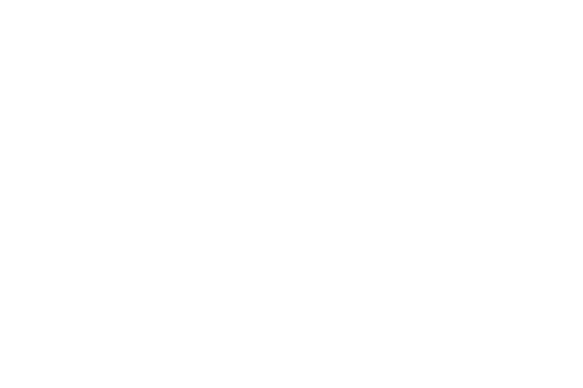

Text(0.5,0,'$\\alpha$')

In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'r', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 'best')
plt.xlabel(r'$\alpha$')

In [28]:
#### Naive grid search for alpha in lasso regression
best_score = 0

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    score = lasso.score(X_test, y_test)
    if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.70
Best parameters: {'alpha': 1}


C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


This suggests that the best $\alpha$ parameter is 1

In [29]:
#### Lasso regression with best pramater: alpha = 1
lasso1 = Lasso(alpha = 1)
train_scores = cross_val_score(lasso1, X_train, y_train, cv=5)
test_scores = cross_val_score(lasso1, X_test, y_test, cv=5)
print("Average Cross-validation training score with alpha=1: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with alpha=1: {}".format(test_scores.mean()))

Average Cross-validation training score with alpha=1: 0.5247489758977725
Average Cross-validation testing score with alpha=1: -0.5626702290924648


In [30]:
lasso1.fit(X, y)
pred_lasso = lasso1.predict(X_test)
pred_lasso

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([-12.84495929, -12.84489146, -15.79095092, -19.953768  ,
       -15.81814983, -15.88333323, -15.87408805, -15.80556125,
       -15.82656164, -20.01601856, -15.82656164, -15.81281424,
       -15.72074904, -12.83086125, -15.90910967, -15.79886892,
       -15.69524892, -15.83191994, -15.86437967, -15.80560541,
       -19.93582498, -19.99573644, -15.80250369, -15.90286969,
       -15.8266096 , -15.81281424, -19.96404853, -12.84476007,
       -15.8759747 , -18.47575438, -14.35955594, -15.87969795,
       -17.94627175, -15.81591869, -15.79086814, -17.97080492,
       -15.82953386, -15.77576591, -17.94269616, -20.08704818,
       -15.90286969, -15.84683461, -15.82835387, -16.412535  ,
       -14.94014572, -14.41341582, -15.99533025, -15.80250382,
       -17.96491883, -15.8217454 , -15.97775977, -15.87674723,
       -15.93284439, -20.00100427, -18.42130847, -15.86400614,
       -11.39736983, -15.88340187, -15.84564815, -20.01768548,
       -12.8400583 , -18.40337214, -15.90903977, -15.81

In [31]:
lasso1 = Lasso(alpha=1)
lasso1.fit(X_train, y_train)
y_pred = lasso1.predict(X_test)
print("R_squared testing score for best lasso Regression: {}".format(r2_score(y_test, y_pred)))

R_squared testing score for best lasso Regression: 0.6970225226227988


### Polynomial Regression

In [32]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

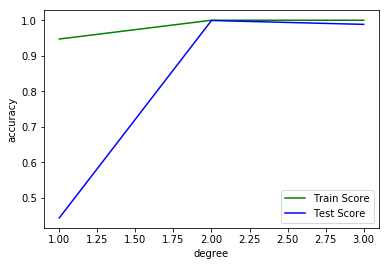

In [33]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [34]:
#### Naive grid search for degree in polynomial regression
best_score = 0
x_range = [1,2,3]
for degree in x_range: 
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    score = lreg.score(X_test_poly, y_test)
    if score > best_score:
            best_score = score
            best_parameters = {'degree': degree}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 1.00
Best parameters: {'degree': 2}


This suggests that the best degree parameter is 2

In [35]:
#### Polynomial regression with best pramater: degree = 2
poly2 = PolynomialFeatures(2)
X_poly2 = poly2.fit_transform(X)
X_train_poly2 = poly2.transform(X_train)
X_test_poly2 = poly2.transform(X_test)
train_scores = cross_val_score(lreg, X_train_poly2, y_train, cv=5)
test_scores = cross_val_score(lreg, X_test_poly2, y_test, cv=5)
print("Average Cross-validation training score with degree=2: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with degree=2: {}".format(test_scores.mean()))

Average Cross-validation training score with degree=2: 0.9114952264991028
Average Cross-validation testing score with degree=2: 0.9634338844730458


In [36]:
lreg.fit(X_poly2, y)
pred_poly = lreg.predict(X_test_poly2)
pred_poly

array([0.1634592 , 0.16344847, 0.17223927, 0.14385678, 0.17011754,
       0.16011908, 0.15956384, 0.16879639, 0.16947869, 0.15553002,
       0.16947869, 0.16898836, 0.15983852, 0.16430154, 0.16072006,
       0.16852264, 0.15977945, 0.1706014 , 0.15912912, 0.16878066,
       0.14188397, 0.15401267, 0.16862061, 0.16037625, 0.16946406,
       0.16898836, 0.1555636 , 0.16541551, 0.1599035 , 0.15433092,
       0.16473924, 0.16393271, 0.15686454, 0.16916967, 0.16014573,
       0.16055282, 0.16965862, 0.16356662, 0.15864812, 0.15797462,
       0.16037625, 0.17025581, 0.17049273, 0.15447732, 0.17948754,
       0.16890836, 0.16371625, 0.16862057, 0.15781498, 0.16336794,
       0.1672152 , 0.15983866, 0.17337609, 0.15323787, 0.16343759,
       0.15961031, 0.19855492, 0.16318213, 0.17109756, 0.15438927,
       0.17068426, 0.16097199, 0.17242284, 0.16901287, 0.17023149,
       0.17658802, 0.15162656, 0.16393094, 0.16037301, 0.16036199,
       0.16430416, 0.16645739, 0.15549484, 0.16251956, 0.15374

In [37]:
poly2 = LinearRegression()
poly2.fit(X_train_poly2, y_train)
y_pred = poly2.predict(X_test_poly2)
print("R_squared testing score for best polynomial Regression: {}".format(r2_score(y_test, y_pred)))

R_squared testing score for best polynomial Regression: 0.9992832509595266


### Simple SVR

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.64


In [39]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000997,0.000631,0.000399,0.000489,0.001,{'C': 0.001},-0.138396,-0.121161,-0.095506,-0.025066,...,-0.103267,0.041818,6,-0.029139,-0.031108,-0.030383,-0.105082,-0.022036,-0.043549,0.030935
1,0.000599,0.000489,0.000399,0.000489,0.01,{'C': 0.01},0.019889,0.061281,0.030369,-0.010629,...,0.009363,0.039430,5,-0.003417,-0.004672,-0.003949,0.004146,-0.000909,-0.001760,0.003213
2,0.000798,0.000399,0.000199,0.000399,0.1,{'C': 0.1},0.221676,0.299110,0.201675,0.014001,...,0.162401,0.103602,4,0.038180,0.038681,0.037282,0.165653,0.032251,0.062409,0.051673
3,0.004388,0.001850,0.000200,0.000399,1,{'C': 1},0.456544,0.560983,0.425093,0.063586,...,0.353853,0.174031,3,0.118290,0.122446,0.113814,0.391454,0.091267,0.167454,0.112517
4,0.011568,0.001493,0.000399,0.000489,10,{'C': 10},0.899497,0.856911,0.599395,0.217644,...,0.628030,0.244606,2,0.307578,0.324440,0.324670,0.673271,0.297323,0.385456,0.144283


This suggests that the best degree parameter is C=100

In [40]:
#### LinearSVR with best parameter: C=100
svr100 = LinearSVR(C=100)
train_scores = cross_val_score(svr100, X_train, y_train, cv=5)
test_scores = cross_val_score(svr100, X_test, y_test, cv=5)
print("Average Cross-validation training score with C=100: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with C=100: {}".format(test_scores.mean()))

Average Cross-validation training score with C=100: 0.6429868987256425
Average Cross-validation testing score with C=100: 0.43184196679207015


In [41]:
svr100.fit(X, y)
pred_svr = svr100.predict(X_test)
pred_svr

array([-0.83987766, -0.84759631, -1.48376662, -1.33454642, -1.06268257,
       -1.10119693, -1.10289537, -1.05134003, -1.06544055, -1.69295223,
       -1.06544055, -1.0664521 ,  0.51316542, -1.07581953, -1.09835559,
       -1.06040913,  0.08464647, -1.06152989, -1.10038263, -1.0573806 ,
       -1.20313484, -1.68056373, -1.06721077, -1.10148585, -1.06514242,
       -1.0664521 , -1.82115364, -0.9279455 , -1.1018127 , -1.33953925,
       -0.79808178, -1.07853805, -1.22655378, -1.04831927,  0.13014687,
       -1.71287173, -1.05157842,  0.14531093, -1.65576734, -1.51626482,
       -1.10148585, -1.05483083, -1.06197759, -1.09705262, -0.95574881,
       -1.0878235 , -1.09011262, -1.06720994, -1.1115571 ,  0.20463316,
       -1.58981398, -1.08202463, -1.03670544, -1.6367668 , -1.28854261,
       -1.10242418,  3.42591685, -1.52718677, -1.05982403, -1.72256779,
       -1.40183407, -0.93284718, -1.05886772, -1.0581442 , -1.05888814,
        0.89493115, -1.23341798, -1.08105016, -1.45624475, -1.08

In [42]:
svr100 = LinearSVR(C=100)
svr100.fit(X_train, y_train)
y_pred = svr100.predict(X_test)
print("R_squared testing score for best LinearSVR: {}".format(r2_score(y_test, y_pred)))

R_squared testing score for best LinearSVR: 0.6865339240839581


### SVR with rbf kernel

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.70


In [44]:
# convert to a dataframe
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
32,0.020451,0.010211,0.001398,4.903330e-04,100,0.1,"{'C': 100, 'gamma': 0.1}",0.922217,0.762841,0.870963,...,0.697106,0.245824,1,0.386419,0.398635,0.389005,0.844137,0.343003,0.472240,0.186934
33,0.069820,0.025556,0.002195,3.989461e-04,100,1,"{'C': 100, 'gamma': 1}",0.866945,0.454456,0.687577,...,0.517973,0.272265,2,0.345647,0.351885,0.342047,0.942745,0.299505,0.456366,0.243891
31,0.009579,0.001343,0.000986,1.584607e-05,100,0.01,"{'C': 100, 'gamma': 0.01}",0.599709,0.644304,0.515265,...,0.439429,0.201407,3,0.160999,0.174322,0.167669,0.483833,0.130678,0.223500,0.131020
26,0.007378,0.000488,0.002005,9.023328e-04,10,0.1,"{'C': 10, 'gamma': 0.1}",0.545894,0.566756,0.484784,...,0.394619,0.186731,4,0.136665,0.149960,0.139101,0.447483,0.103540,0.195350,0.127018
27,0.009966,0.001410,0.001197,3.988505e-04,10,1,"{'C': 10, 'gamma': 1}",0.485204,0.545189,0.329987,...,0.317740,0.190977,5,0.093154,0.101465,0.097087,0.429422,0.075451,0.159316,0.135342
34,0.035902,0.009708,0.001384,4.731896e-04,100,10,"{'C': 100, 'gamma': 10}",0.560424,0.378104,0.260402,...,0.288173,0.178837,6,0.317518,0.321495,0.316453,0.921500,0.274520,0.430297,0.246197
30,0.005584,0.000491,0.001396,4.871582e-04,100,0.001,"{'C': 100, 'gamma': 0.001}",0.277431,0.352664,0.256078,...,0.203821,0.120298,7,0.054729,0.054160,0.053166,0.209230,0.042068,0.082670,0.063451
25,0.006784,0.001165,0.001593,4.864997e-04,10,0.01,"{'C': 10, 'gamma': 0.01}",0.272841,0.345488,0.248993,...,0.199577,0.117826,8,0.052664,0.052276,0.051184,0.206621,0.041605,0.080870,0.063007
20,0.007180,0.000399,0.001996,8.941518e-04,1,0.1,"{'C': 1, 'gamma': 0.1}",0.243916,0.308868,0.206403,...,0.170242,0.109254,9,0.038759,0.037115,0.037566,0.170199,0.031555,0.063039,0.053637
35,0.044203,0.009979,0.001993,6.305341e-04,100,100,"{'C': 100, 'gamma': 100}",0.214593,0.290924,0.222458,...,0.166520,0.100513,10,0.310785,0.315463,0.310481,0.915192,0.269477,0.424280,0.246021


<IPython.core.display.Javascript object>


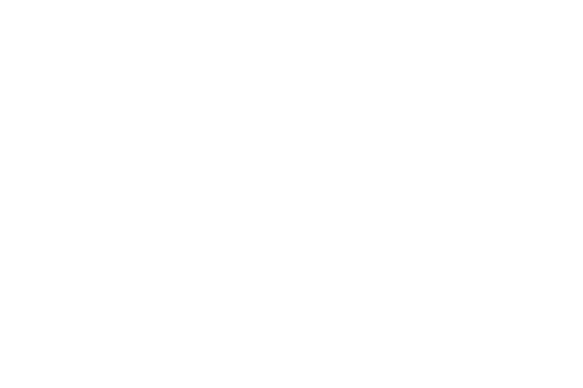

In [45]:
%matplotlib notebook
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

This suggests that the best degree parameter is C=100 and gamma=0.1

In [46]:
#### SVR with rbf kernel with best parameters: C=100 and gamma=0.1
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
train_scores = cross_val_score(svr_rbf, X_train, y_train, cv=5)
test_scores = cross_val_score(svr_rbf, X_test, y_test, cv=5)
print("Average Cross-validation training score with C=100 and gamma=0.01: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with C=100 and gamma=0.01: {}".format(test_scores.mean()))

Average Cross-validation training score with C=100 and gamma=0.01: 0.6961065765997467
Average Cross-validation testing score with C=100 and gamma=0.01: 0.36879441185647927


In [47]:
svr_rbf.fit(X, y)
pred_rbf = svr_rbf.predict(X_test)
pred_rbf

array([13.83577843, 13.83576684, 13.83890939, 13.81952426, 13.84198822,
       13.84506649, 13.84535338, 13.84267375, 13.84211502, 13.83007337,
       13.84211502, 13.84249075, 13.82409528, 13.83216415, 13.84465082,
       13.84286889, 13.82342579, 13.84161021, 13.84559362, 13.84267604,
       13.80020437, 13.83216299, 13.84277635, 13.84482469, 13.84211175,
       13.84249075, 13.82726328, 13.83184003, 13.84521328, 13.82682788,
       13.80577459, 13.84365558, 13.8384641 , 13.84238843, 13.81993959,
       13.83457481, 13.84201507, 13.81736221, 13.83883555, 13.81461866,
       13.84482469, 13.84155951, 13.84170543, 13.83797214, 13.81792653,
       13.82411336, 13.84304215, 13.84277634, 13.83763584, 13.81658025,
       13.83651911, 13.84523569, 13.83951145, 13.83535454, 13.82257004,
       13.84542957, 13.8064634 , 13.8420328 , 13.84124222, 13.8315465 ,
       13.81988722, 13.77857936, 13.84004495, 13.84248734, 13.84156257,
       13.80109859, 13.82114536, 13.84365604, 13.82475633, 13.84

In [48]:
svr_rbf = SVR(C=100, gamma=0.1, kernel="rbf")
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
print("R_squared testing score for best SVR with rbf kernel: {}".format(r2_score(y_test, y_pred)))

R_squared testing score for best SVR with rbf kernel: 0.7974720324464077


### SVR with poly kernel

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly') 
param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(svr_poly, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 10}
Best cross-validation score: 0.94


In [50]:
#### SVR with poly kernel with best parameters: C=1 and gamma=10
svr_poly = SVR(kernel='poly', C=1, gamma=10)
train_scores = cross_val_score(svr_poly, X_train, y_train, cv=5)
test_scores = cross_val_score(svr_poly, X_test, y_test, cv=5)
print("Average Cross-validation training score with C=1 and gamma=10: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with C=1 and gamma=10: {}".format(test_scores.mean()))

Average Cross-validation training score with C=1 and gamma=10: 0.9445156475621715
Average Cross-validation testing score with C=1 and gamma=10: 0.8293579640731694


In [51]:
svr_poly = SVR(C=1, gamma=10, kernel="poly")
svr_poly.fit(X_train, y_train)
y_pred = svr_poly.predict(X_test)
print("R_squared testing score for best SVR with poly kernel: {}".format(r2_score(y_test, y_pred)))

R_squared testing score for best SVR with poly kernel: 0.9753808599079526


### SVR with linear kernel

In [52]:

svr_ln = SVR(kernel='linear')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svr_ln, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.65


In [53]:
#### SVR with poly kernel with best parameters: C=100 and gamma=0.001
svr_ln = SVR(kernel='linear', C=100, gamma=0.001)
train_scores = cross_val_score(svr_ln, X_train, y_train, cv=5)
test_scores = cross_val_score(svr_ln, X_test, y_test, cv=5)
print("Average Cross-validation training score with C=100 and gamma=0.001: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with C=100 and gamma=0.001: {}".format(test_scores.mean()))

Average Cross-validation training score with C=100 and gamma=0.001: 0.6463875566805722
Average Cross-validation testing score with C=100 and gamma=0.001: 0.43634801720988897


In [54]:
svr_ln = SVR(C=100, gamma=0.001, kernel="linear")
svr_ln.fit(X_train, y_train)
y_pred = svr_ln.predict(X_test)
print("R_squared testing score for best SVR with linear kernel: {}".format(r2_score(y_test, y_pred)))

R_squared testing score for best SVR with linear kernel: 0.6885917447896932


# Classification

In [55]:
y = df['Risk']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### KNN classifcation

Text(0,0.5,'MSE')

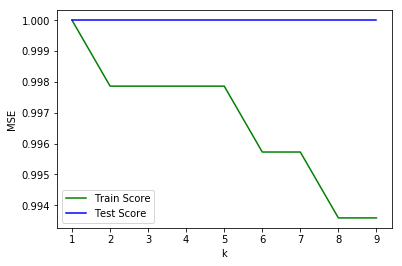

In [56]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(X_train, y_train)
    train_score_array.append(knn_clf.score(X_train, y_train))
    test_score_array.append(knn_clf.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

This suggests that the best parameter is k=3

In [57]:
#### KNN Classifier with best pramater: k = 3
knn_clf3 = KNeighborsClassifier(3)
train_scores = cross_val_score(knn_clf3, X_train, y_train, cv=5)
test_scores = cross_val_score(knn_clf3, X_test, y_test, cv=5)
print("Average Cross-validation training score with k=3: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with k=3: {}".format(test_scores.mean()))


Average Cross-validation training score with k=3: 0.997872340425532
Average Cross-validation testing score with k=3: 1.0


In [58]:
knn_clf3.fit(X_train, y_train)
pred_knn_clf = knn_clf3.predict(X_test)
pred_knn_clf

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_knn_clf)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[75  0]
 [ 0 82]]


In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
print("Precision test score: {}".format(precision_score(y_test, pred_knn_clf)))
print("Accuracy test score: {}".format(accuracy_score(y_test, pred_knn_clf)))

Precision test score: 1.0
Accuracy test score: 1.0


### Logistic Regression

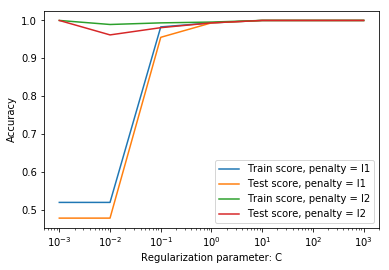

In [61]:
from sklearn.linear_model import LogisticRegression
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

This suggests that the best parameter is C=0.1 and penalty=l2

In [62]:
#### Logit regression with best pramater: C=0.1 and penalty=l2
log = LogisticRegression(penalty = 'l2', C = 0.1)
train_scores = cross_val_score(log, X_train, y_train, cv=5)
test_scores = cross_val_score(log, X_test, y_test, cv=5)
print("Average Cross-validation training score with C=0.1 and penalty=l2: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with C=0.1 and penalty=l2: {}".format(test_scores.mean()))


Average Cross-validation training score with C=0.1 and penalty=l2: 0.987211164493251
Average Cross-validation testing score with C=0.1 and penalty=l2: 0.9806451612903226


In [63]:
log.fit(X_train, y_train)
pred_log = log.predict(X_test)
pred_log

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [64]:
confusion = confusion_matrix(y_test, pred_log)
print("Confusion matrix:\n{}".format(confusion))
print("Precision test score: {}".format(precision_score(y_test, pred_log)))
print("Accuracy test score: {}".format(accuracy_score(y_test, pred_log)))

Confusion matrix:
[[75  0]
 [ 3 79]]
Precision test score: 1.0
Accuracy test score: 0.9808917197452229


### Linear Supprt Vector Machine

In [65]:
from sklearn.svm import LinearSVC
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC (), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 1.00


In [66]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.001404,0.000498,0.000199,0.000398,1,{'C': 1},0.989362,1.000000,1.000000,1.000000,...,0.995726,0.005239,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.004388,0.000798,0.000000,0.000000,10,{'C': 10},0.989362,1.000000,1.000000,1.000000,...,0.995726,0.005239,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.008359,0.001747,0.000000,0.000000,100,{'C': 100},0.989362,1.000000,1.000000,1.000000,...,0.995726,0.005239,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.000996,0.000004,0.000000,0.000000,0.1,{'C': 0.1},0.978723,1.000000,1.000000,0.989247,...,0.991453,0.007989,4,1.000000,0.994652,0.994652,0.994667,0.994667,0.995728,0.002136
0,0.001203,0.000396,0.000000,0.000000,0.001,{'C': 0.001},0.978723,0.978723,1.000000,1.000000,...,0.989316,0.009523,5,0.991979,0.991979,0.986631,0.986667,0.989333,0.989318,0.002384
1,0.001205,0.000395,0.000000,0.000000,0.01,{'C': 0.01},0.978723,0.978723,0.989362,1.000000,...,0.987179,0.007949,6,0.994652,0.986631,0.989305,0.981333,0.992000,0.988784,0.004587


This suggests that the best degree parameter is C=0.01 or C=0.1 or C=1 or C=10 or C=100

In [67]:
#### LinearSVC with best parameter: C=1
svc1 = LinearSVC(C=1)
train_scores = cross_val_score(svc1, X_train, y_train, cv=5)
test_scores = cross_val_score(svc1, X_test, y_test, cv=5)
print("Average Cross-validation training score with C=1: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with C=1: {}".format(test_scores.mean()))

Average Cross-validation training score with C=1: 0.9957218027911233
Average Cross-validation testing score with C=1: 1.0


In [68]:
svc1.fit(X_train, y_train)
pred_svc = svc1.predict(X_test)
pred_svc

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [69]:
confusion = confusion_matrix(y_test, pred_svc)
print("Confusion matrix:\n{}".format(confusion))
print("Precision test score: {}".format(precision_score(y_test, pred_svc)))
print("Accuracy test score: {}".format(accuracy_score(y_test, pred_svc)))

Confusion matrix:
[[75  0]
 [ 0 82]]
Precision test score: 1.0
Accuracy test score: 1.0


### Support Vector Machine with rbf kernel

In [70]:
from sklearn.svm import SVC
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 1}
Best cross-validation score: 0.98


In [71]:
# convert to a dataframe
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
33,0.001396,0.000488,0.000784,0.000392,100,1,"{'C': 100, 'gamma': 1}",0.969280,0.984171,0.981465,...,0.979138,0.005137,1,0.985298,0.984319,0.983850,0.984141,0.984699,0.984462,0.000500
27,0.001614,0.000502,0.000199,0.000399,10,1,"{'C': 10, 'gamma': 1}",0.969280,0.984171,0.981465,...,0.979138,0.005137,1,0.985298,0.984319,0.983850,0.984141,0.984699,0.984462,0.000500
21,0.001798,0.000400,0.000199,0.000399,1,1,"{'C': 1, 'gamma': 1}",0.969280,0.983934,0.981265,...,0.978887,0.005044,3,0.985298,0.984147,0.983665,0.983947,0.984018,0.984215,0.000564
15,0.002200,0.000396,0.000605,0.000494,0.1,1,"{'C': 0.1, 'gamma': 1}",0.964200,0.975501,0.971780,...,0.971386,0.003888,4,0.976883,0.974396,0.973382,0.973851,0.975259,0.974754,0.001234
32,0.007599,0.000479,0.000598,0.000488,100,0.1,"{'C': 100, 'gamma': 0.1}",0.952655,0.970813,0.959366,...,0.957421,0.008269,5,0.970493,0.973761,0.970688,0.968458,0.975639,0.971808,0.002557
34,0.005771,0.000407,0.001012,0.000016,100,10,"{'C': 100, 'gamma': 10}",0.953626,0.961224,0.958683,...,0.956638,0.002962,6,0.968029,0.967068,0.967785,0.968905,0.966981,0.967753,0.000703
28,0.005797,0.000405,0.000998,0.000001,10,10,"{'C': 10, 'gamma': 10}",0.953626,0.961224,0.958683,...,0.956638,0.002962,6,0.968029,0.967068,0.967785,0.968905,0.966981,0.967753,0.000703
22,0.006177,0.000402,0.000798,0.000399,1,10,"{'C': 1, 'gamma': 10}",0.953626,0.961224,0.958683,...,0.956638,0.002962,6,0.968029,0.967068,0.967785,0.968905,0.966981,0.967753,0.000703
26,0.006382,0.000487,0.000200,0.000399,10,0.1,"{'C': 10, 'gamma': 0.1}",0.950502,0.966044,0.957818,...,0.956159,0.008329,9,0.968123,0.968125,0.967031,0.966455,0.967347,0.967416,0.000645
20,0.003322,0.000419,0.000399,0.000488,1,0.1,"{'C': 1, 'gamma': 0.1}",0.934758,0.964970,0.952196,...,0.948754,0.010069,10,0.960750,0.956539,0.956611,0.957671,0.956871,0.957688,0.001583


<IPython.core.display.Javascript object>


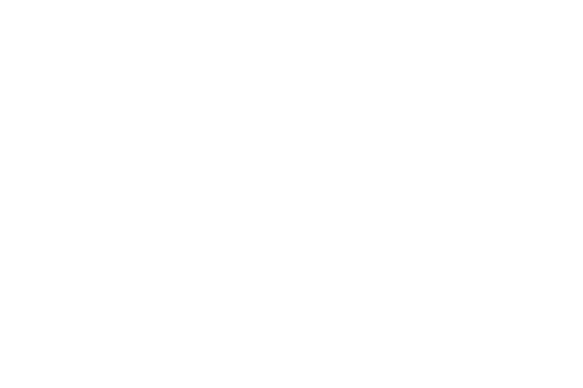

<IPython.core.display.Javascript object>


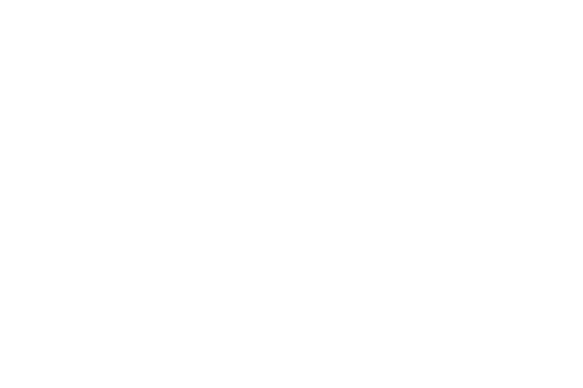

In [72]:
%matplotlib notebook
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

This suggests that the best parameter is C=10 and gamma=1

In [73]:
#### SVC with rbf kernel with best parameters: C=10 and gamma=1
svc_rbf = SVC(kernel='rbf', C=10, gamma=1)
train_scores = cross_val_score(svc_rbf, X_train, y_train, cv=5)
test_scores = cross_val_score(svc_rbf, X_test, y_test, cv=5)
print("Average Cross-validation training score with C=10 and gamma=1: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with C=10 and gamma=1: {}".format(test_scores.mean()))

Average Cross-validation training score with C=10 and gamma=1: 0.997872340425532
Average Cross-validation testing score with C=10 and gamma=1: 1.0


In [74]:
svc_rbf.fit(X_train, y_train)
pred_svc_rbf = svc_rbf.predict(X_test)
pred_svc_rbf

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [75]:
confusion = confusion_matrix(y_test, pred_svc_rbf)
print("Confusion matrix:\n{}".format(confusion))
print("Precision test score: {}".format(precision_score(y_test, pred_svc_rbf)))
print("Accuracy test score: {}".format(accuracy_score(y_test, pred_svc_rbf)))

Confusion matrix:
[[75  0]
 [ 0 82]]
Precision test score: 1.0
Accuracy test score: 1.0


### Support Vector Machine with poly kernel

In [76]:
from sklearn.svm import SVC
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.88


In [77]:
#### SVC with poly kernel with best parameters: C=100 and gamma=0.1
svc_poly = SVC(kernel='poly', C=100, gamma=0.1)
train_scores = cross_val_score(svc_poly, X_train, y_train, cv=5)
test_scores = cross_val_score(svc_poly, X_test, y_test, cv=5)
print("Average Cross-validation training score with C=100 and gamma=0.1: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with C=100 and gamma=0.1: {}".format(test_scores.mean()))

Average Cross-validation training score with C=100 and gamma=0.1: 0.9892930679478381
Average Cross-validation testing score with C=100 and gamma=0.1: 0.9679435483870968


In [78]:
svc_poly.fit(X_train, y_train)
pred_svc_poly = svc_poly.predict(X_test)
pred_svc_poly

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [79]:
confusion = confusion_matrix(y_test, pred_svc_poly)
print("Confusion matrix:\n{}".format(confusion))
print("Precision test score: {}".format(precision_score(y_test, pred_svc_poly)))
print("Accuracy test score: {}".format(accuracy_score(y_test, pred_svc_poly)))

Confusion matrix:
[[75  0]
 [ 3 79]]
Precision test score: 1.0
Accuracy test score: 0.9808917197452229


### Support Vector Machine with linear kernel

In [80]:
from sklearn.svm import SVC
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'gamma': 0.001}
Best cross-validation score: 0.78


In [81]:
#### SVC with linear kernel with best parameters: C=0.1 and gamma=0.001
svc_ln = SVC(kernel='linear', C=0.1, gamma=0.001)
train_scores = cross_val_score(svc_ln, X_train, y_train, cv=5)
test_scores = cross_val_score(svc_ln, X_test, y_test, cv=5)
print("Average Cross-validation training score with C==0.1 and gamma=0.001: {}".format(train_scores.mean()))
print("Average Cross-validation testing score with C=0.1 and gamma=0.001: {}".format(test_scores.mean()))

Average Cross-validation training score with C==0.1 and gamma=0.001: 0.9914436055822466
Average Cross-validation testing score with C=0.1 and gamma=0.001: 0.9806451612903226


In [82]:
svc_ln.fit(X_train, y_train)
pred_svc_ln = svc_ln.predict(X_test)
pred_svc_ln

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [83]:
confusion = confusion_matrix(y_test, pred_svc_ln)
print("Confusion matrix:\n{}".format(confusion))
print("Precision test score: {}".format(precision_score(y_test, pred_svc_ln)))
print("Accuracy test score: {}".format(accuracy_score(y_test, pred_svc_ln)))

Confusion matrix:
[[75  0]
 [ 2 80]]
Precision test score: 1.0
Accuracy test score: 0.9872611464968153


### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [85]:
pred_dtree = dtree.predict(X_test)
pred_dtree

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [86]:
confusion = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix:\n{}".format(confusion))
print("Precision test score: {}".format(precision_score(y_test, pred_dtree)))
print("Accuracy test score: {}".format(accuracy_score(y_test, pred_dtree)))


Confusion matrix:
[[75  0]
 [ 0 82]]
Precision test score: 1.0
Accuracy test score: 1.0


#### Conclusion: From the above models, we can see that the polynomila linear model has the best performace among the regressions. Among all the classification algorithms, logit regression, decision tree and linear svc all have the best performace with a 100% accuracy score.